In [13]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import joblib as jb
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from scipy.io import arff

In [14]:
data, meta = arff.loadarff('two_dataset.arff')
df = pd.DataFrame(data)
df.head()
print(df.columns.tolist())
print(df.isnull().sum())

['Xloc', 'Yloc', 'Landuse_1', 'Landuse_2', 'Landuse_3', 'Landuse_4', 'Rock_1', 'Rock_2', 'Rock_3', 'Rock_4', 'Rock_5', 'Cr', 'Ni', 'Pb', 'Zn', 'Cd', 'Co', 'Cu']
Xloc         0
Yloc         0
Landuse_1    0
Landuse_2    0
Landuse_3    0
Landuse_4    0
Rock_1       0
Rock_2       0
Rock_3       0
Rock_4       0
Rock_5       0
Cr           0
Ni           0
Pb           0
Zn           0
Cd           0
Co           0
Cu           0
dtype: int64


In [15]:
def remove_outliers(df, cols):
    for col in cols:
        q1 = df[col].quantile(0.10)
        q2 = df[col].quantile(0.80)
        iqr = q2-q1
        upper = q2 + 0.3*iqr
        lower = q1 - 0.3*iqr
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df


In [16]:
df = remove_outliers(df, df.columns)

x = df[['Xloc', 'Yloc', 'Landuse_1', 'Landuse_2', 'Landuse_3', 'Landuse_4',
'Rock_1', 'Rock_2', 'Rock_3', 'Rock_4', 'Rock_5']].values.reshape(-1,11)
y = df[['Cr', 'Ni', 'Pb', 'Zn', 'Cd', 'Co', 'Cu']].values.reshape(-1,7)

xs = MinMaxScaler()
ys = MinMaxScaler()

x = xs.fit_transform(x)
y = ys.fit_transform(y)

jb.dump(xs,"two_x_scaler.pkl")
jb.dump(ys, 'two_y_scaler.pkl')

['two_y_scaler.pkl']

In [18]:
def prob(x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11):
    inp = np.array([[x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11]], dtype=float)
    xs = jb.load('two_x_scaler.pkl')
    ys = jb.load('two_y_scaler.pkl')
    inp = xs.transform(inp)
    model_path = "two.keras"
    if (os.path.exists(model_path)):
        model = keras.models.load_model(model_path)
    else:
        model = keras.Sequential([keras.layers.Dense(32, input_shape=(11,), activation='relu'),
                                  keras.layers.Dense(16, activation='relu'),
                                  keras.layers.Dense(units = 7)])
        model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')
        h = model.fit(x,y,epochs=300)
        model.save('two.keras')
        pred = model.predict(x)
        lv = h.history['loss']
        plt.figure()
        plt.plot(lv)
        plt.title('loss values')
        plt.xlabel('Iterations')
        plt.ylabel('loss')
        plt.grid(True)
        plt.show()

        n = y.shape[1]
        cols = 3
        rows = (n+1)//2
        plt.figure(figsize=(cols*5, rows*5))
        for i in range(n):
            plt.subplot(rows, cols, i+1)
            plt.title(y[i+1])
            plt.xlabel('actual')
            plt.ylabel('predicted')
            plt.scatter(y[:, i], pred[:, i], label='actual vs predicted', color='pink')
            plt.plot([y[:, i].min(), y[:, i].max()], [y[:, i].min(), y[:, i].max()], 'k--')
            plt.grid(True)
            plt.legend()
        
        plt.tight_layout()
        plt.show()

    return ys.inverse_transform(model.predict(inp))[0]


Epoch 1/300


c:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.3197
Epoch 2/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2722
Epoch 3/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2439
Epoch 4/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2014
Epoch 5/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2012
Epoch 6/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1784
Epoch 7/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1592
Epoch 8/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1447
Epoch 9/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1359 
Epoch 10/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1257
Epoch 11/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1161
Epoch 12/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1115
Epoch 13/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0979
Epoch 14/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0916
Epoch 15/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0833
Epoch 16/300
5/5 ━━━━━━━━━━━━━━

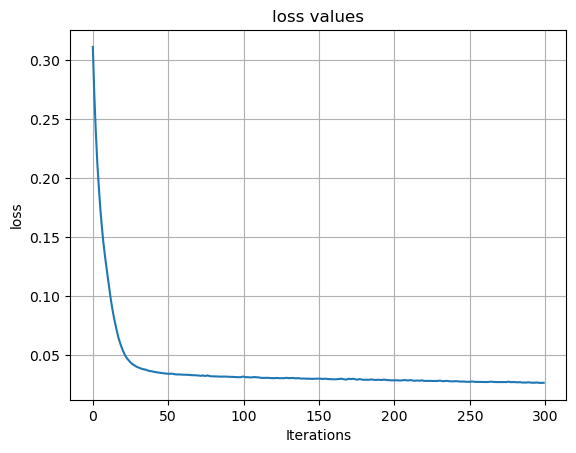

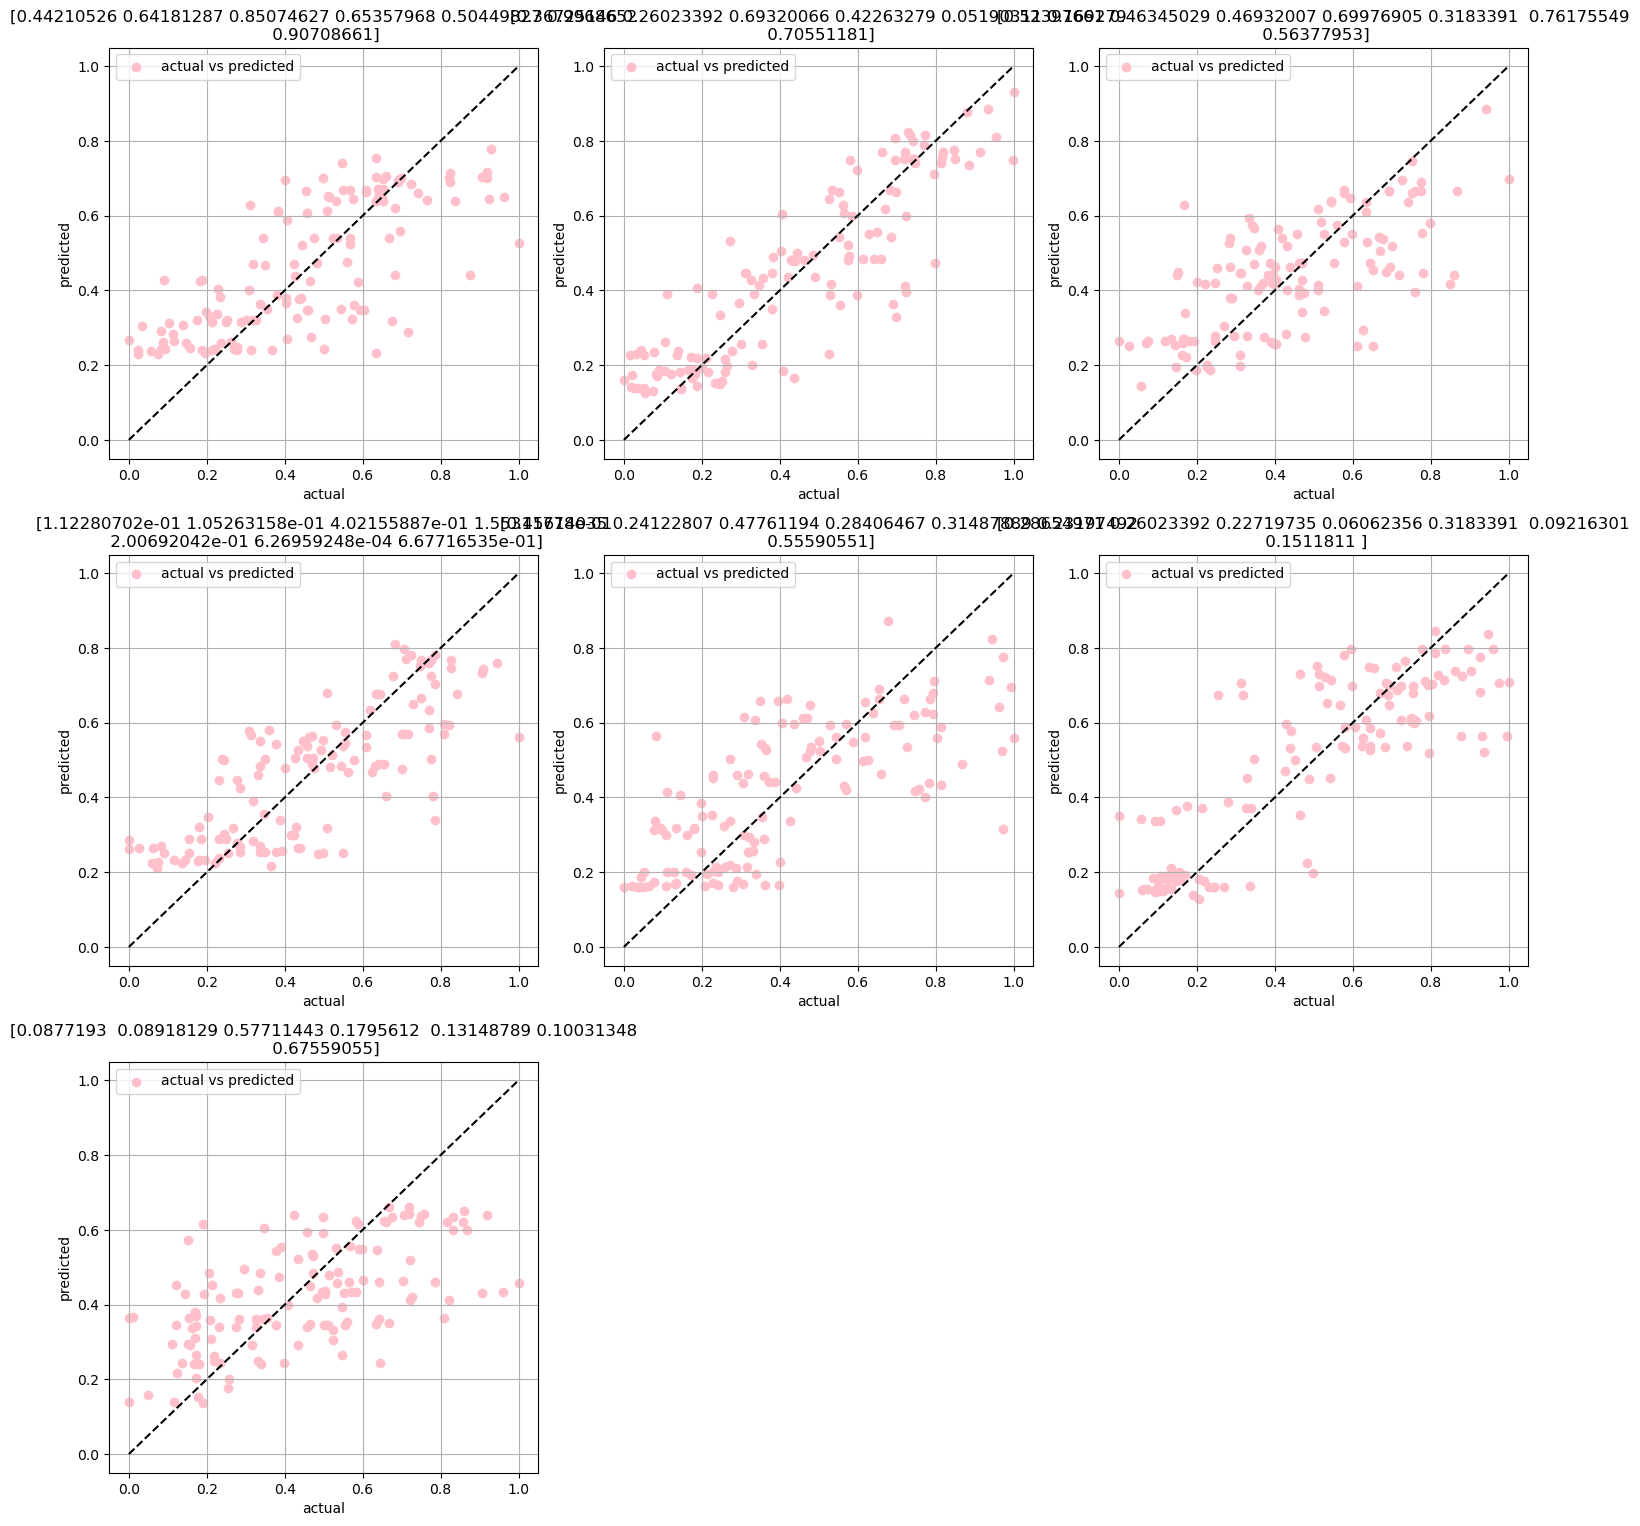

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
[29.32419     6.7252607  22.207573   45.96383     0.34957802  8.225568
 15.102641  ]


In [19]:
print(prob(2.5,4.56,0,0,1,0,1,0,1,0,1))